![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [90]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [91]:
# Getting an overview
crimes.info()
crimes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


In [92]:
# Which hour has the highest frequency of crimes?
# create new column showing the hour of the crime
crimes['crime_hour'] = crimes['TIME OCC'].apply(lambda x: x[:2])
crime_freq_per_hour = crimes['crime_hour'].value_counts(normalize=True)
crime_freq_per_hour

12    0.073570
18    0.054519
17    0.053652
20    0.051579
15    0.050577
19    0.049872
16    0.049668
14    0.047772
11    0.047314
00    0.046997
21    0.046851
22    0.045936
13    0.045629
10    0.045446
08    0.040508
23    0.039948
09    0.038188
01    0.031424
06    0.030267
07    0.029093
02    0.025448
03    0.021231
04    0.017435
05    0.017075
Name: crime_hour, dtype: float64

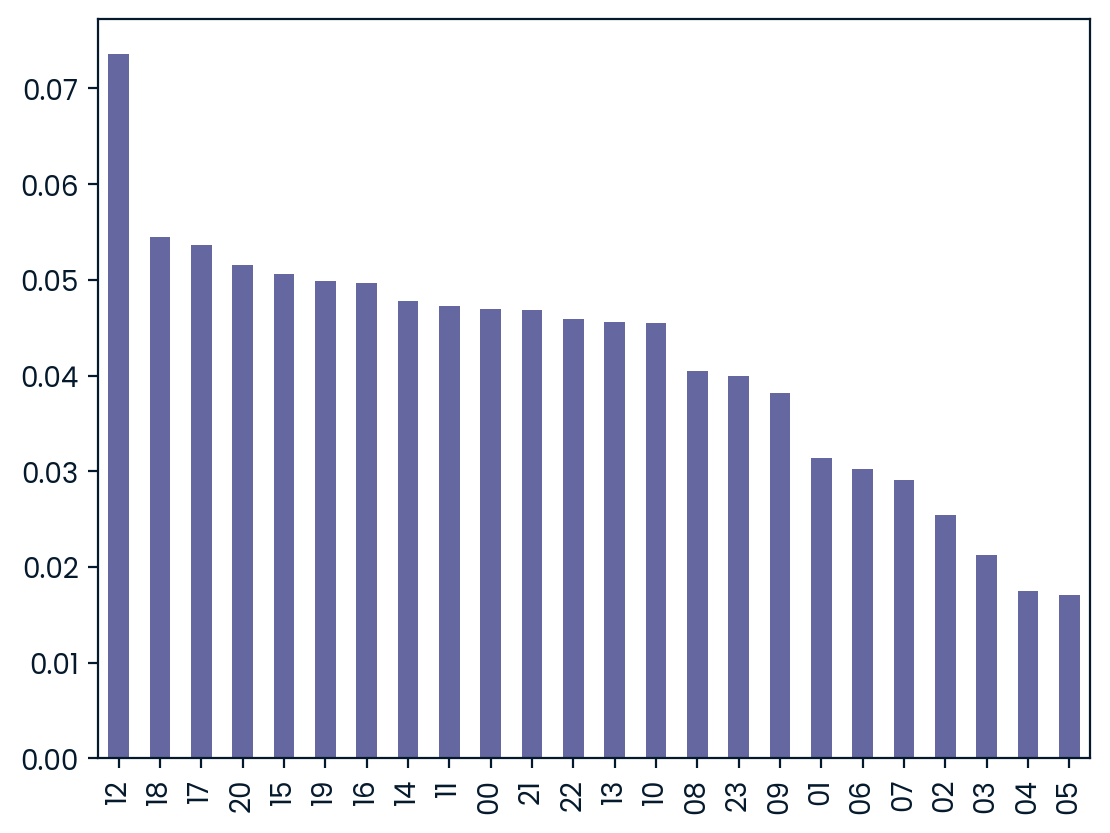

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_freq_per_hour.plot(kind='bar')
plt.show()

In [94]:
peak_crime_hour = 12

In [95]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
crimes['crime_hour'] = crimes['crime_hour'].astype(str)
night_hours = ['22','23','0','1','2','3']
night_crimes = crimes[crimes['crime_hour'].isin(night_hours)]
night_crimes['crime_hour'].value_counts()

22    8531
23    7419
Name: crime_hour, dtype: int64

In [96]:
night_crimes['AREA NAME'].value_counts(normalize=True)

Central        0.092853
Hollywood      0.067398
Southwest      0.061567
77th Street    0.059373
Olympic        0.055987
Pacific        0.054859
Rampart        0.049530
Northeast      0.047837
Southeast      0.047712
Wilshire       0.046708
Newton         0.046019
N Hollywood    0.045705
Van Nuys       0.041379
West Valley    0.039812
Mission        0.039373
Harbor         0.036740
Topanga        0.035486
Devonshire     0.034420
West LA        0.032602
Foothill       0.032351
Hollenbeck     0.032288
Name: AREA NAME, dtype: float64

In [97]:
peak_night_crime_location = 'Central'

In [98]:
# Identify the number of crimes committed against victims of different age groups.
# create a new column showing the victim age groups
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
crimes['victim_ages'] = pd.cut(crimes['Vict Age'], labels=labels, bins=bins)
victim_ages = crimes['victim_ages'].value_counts(normalize=False)
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: victim_ages, dtype: int64

In [99]:
type(victim_ages)

pandas.core.series.Series